# Palleja & Suez Significant mOTUs baseline random forest
## Using vegdist. Both studies from NGless result!

## 1. Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Users/Jessica/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
genus = pd.read_csv('/Users/Jessica/Documents/Lab/Multiple_longitudinal/Microbe_resilience/Palleja_Suez_significant_mOTU_baseline_vegdist_bray_forML.txt',
                   delimiter = "\t")

In [3]:
genus.head()

,Study,ID,Dist_V1V2,Timepoint,Run,Bacteroides.coprophilus..ref_mOTU_v25_04094.,Bacteroides.dorei.vulgatus..ref_mOTU_v25_02367.,Bacteroides.faecis.thetaiotaomicron..ref_mOTU_v25_01657.,Bacteroides.massiliensis..ref_mOTU_v25_02135.,Bacteroides.rodentium.uniformis..ref_mOTU_v25_00855.,...,Faecalibacterium.prausnitzii..ref_mOTU_v25_06108.,Faecalibacterium.prausnitzii..ref_mOTU_v25_06109.,Faecalibacterium.prausnitzii..ref_mOTU_v25_06110.,Faecalibacterium.prausnitzii..ref_mOTU_v25_06112.,Faecalibacterium.sp...ref_mOTU_v25_03636.,Faecalibacterium.species.incertae.sedis..meta_mOTU_v25_12303.,Faecalibacterium.species.incertae.sedis..meta_mOTU_v25_12325.,Faecalibacterium.species.incertae.sedis..meta_mOTU_v25_12376.,Faecalibacterium.species.incertae.sedis..meta_mOTU_v25_12403.,Eggerthellaceae.species.incertae.sedis..meta_mOTU_v25_13204.
0,Suez,603,0.547619,Baseline,ERR2749744,0,4,0,0,1,...,0,5,2,4,1,0,0,0,0,0
1,Suez,604,0.760218,Baseline,ERR2749783,0,0,0,0,0,...,1,1,0,1,0,0,1,0,0,0
2,Suez,605,0.883333,Baseline,ERR2749816,0,0,0,0,0,...,3,0,1,0,0,0,0,0,0,0
3,Suez,606,0.989071,Baseline,ERR2749856,4,6,0,4,0,...,3,4,0,0,0,0,0,0,0,0
4,Suez,704,0.968379,Baseline,ERR2750073,0,1,1,0,0,...,5,2,1,1,0,1,1,1,1,0


### Separate the data into meta variables and microbe variables

In [6]:
microbe = genus.iloc[:, 5:len(genus.columns)]

In [7]:
microbe.head()

,Bacteroides.coprophilus..ref_mOTU_v25_04094.,Bacteroides.dorei.vulgatus..ref_mOTU_v25_02367.,Bacteroides.faecis.thetaiotaomicron..ref_mOTU_v25_01657.,Bacteroides.massiliensis..ref_mOTU_v25_02135.,Bacteroides.rodentium.uniformis..ref_mOTU_v25_00855.,Bacteroides.sp...ref_mOTU_v25_03475.,Bacteroides.stercoris..ref_mOTU_v25_01579.,Bifidobacterium.adolescentis..ref_mOTU_v25_02703.,Faecalibacterium.prausnitzii..ref_mOTU_v25_06108.,Faecalibacterium.prausnitzii..ref_mOTU_v25_06109.,Faecalibacterium.prausnitzii..ref_mOTU_v25_06110.,Faecalibacterium.prausnitzii..ref_mOTU_v25_06112.,Faecalibacterium.sp...ref_mOTU_v25_03636.,Faecalibacterium.species.incertae.sedis..meta_mOTU_v25_12303.,Faecalibacterium.species.incertae.sedis..meta_mOTU_v25_12325.,Faecalibacterium.species.incertae.sedis..meta_mOTU_v25_12376.,Faecalibacterium.species.incertae.sedis..meta_mOTU_v25_12403.,Eggerthellaceae.species.incertae.sedis..meta_mOTU_v25_13204.
0,0,4,0,0,1,0,0,0,0,5,2,4,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0
2,0,0,0,0,0,0,0,2,3,0,1,0,0,0,0,0,0,0
3,4,6,0,4,0,0,1,0,3,4,0,0,0,0,0,0,0,0
4,0,1,1,0,0,0,0,2,5,2,1,1,0,1,1,1,1,0


### Variance Test: to exclude meaningless features

In [8]:
# Calculate variances
all_var = microbe.var()
all_var_val = all_var.values.tolist() #Extract only the variances to a list

Text(0.5, 0, 'All variance')

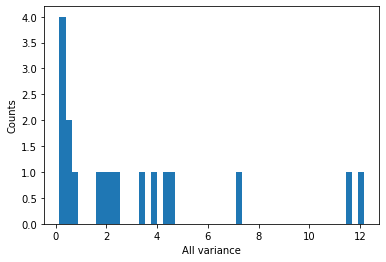

In [9]:
# Plot all variace
plt.hist(all_var_val, density=False, bins=50)  # density=False would make counts
plt.ylabel('Counts')
#plt.xlim([0, 1])
plt.xlabel('All variance')

In [10]:
# The largest variance is only 0.031, so the variance threshold =1 doesn't apply 
all_var.max() 

12.147058823529411

In [11]:
# Define filter_by_variance function
#from sklearn.feature_selection import VarianceThreshold

#def filter_by_variance(data, var_thr):
#    constant_filter = VarianceThreshold(threshold=var_thr)
#   constant_filter.fit(data)
#    features_to_keep = data.columns[constant_filter.get_support()]
#    return features_to_keep

### Correlation test: To figure out if we need models that can deal with correlated data (Elastic net) or if it suffices to take a model that uses one-by-one feature selection (Lasso)


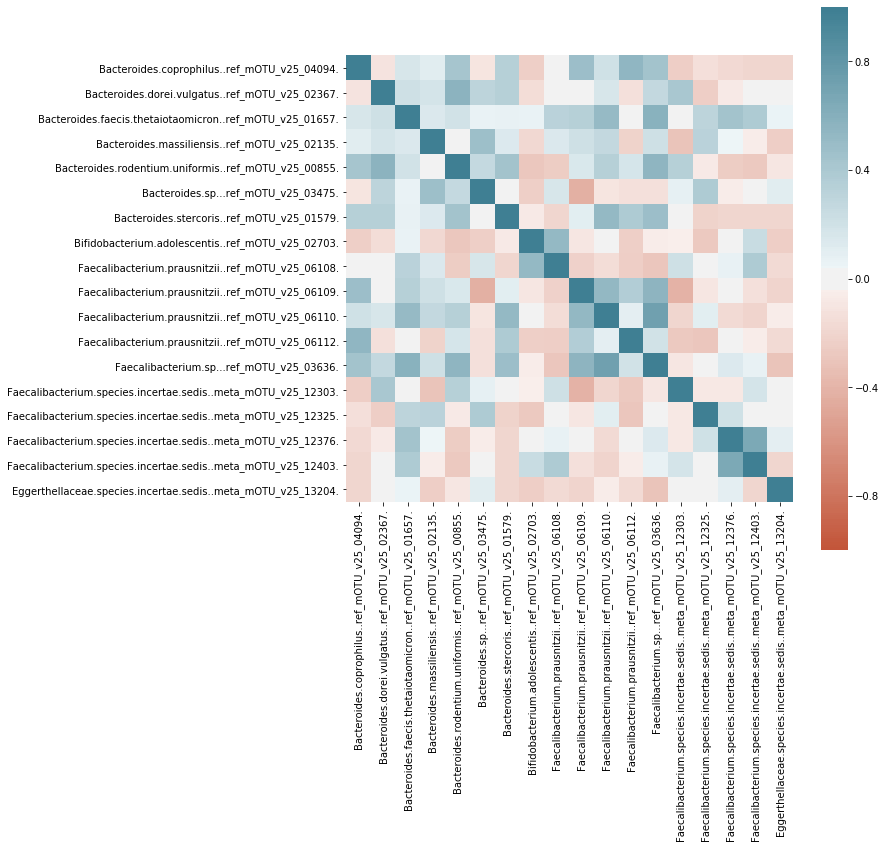

In [12]:
plt.rcParams['figure.figsize'] = [10, 10]
sns.heatmap(microbe.corr(), vmin=-1, vmax=1, center=0, 
            cmap=sns.diverging_palette(20, 220, n=200),square=True)

From the correlation test above, there’s no really high correlation between features, so elastic net isn’t required, I can use Lasso instead.

### Feature Importance test (skipped)

## 2. Set up evaluation environment. Use stratified 5-fold CV to determine the accuracy of the model

In [13]:
my_data = genus.drop(columns=['Timepoint', 'Study', 'Run'])

In [14]:
my_data.head()

,ID,Dist_V1V2,Bacteroides.coprophilus..ref_mOTU_v25_04094.,Bacteroides.dorei.vulgatus..ref_mOTU_v25_02367.,Bacteroides.faecis.thetaiotaomicron..ref_mOTU_v25_01657.,Bacteroides.massiliensis..ref_mOTU_v25_02135.,Bacteroides.rodentium.uniformis..ref_mOTU_v25_00855.,Bacteroides.sp...ref_mOTU_v25_03475.,Bacteroides.stercoris..ref_mOTU_v25_01579.,Bifidobacterium.adolescentis..ref_mOTU_v25_02703.,Faecalibacterium.prausnitzii..ref_mOTU_v25_06108.,Faecalibacterium.prausnitzii..ref_mOTU_v25_06109.,Faecalibacterium.prausnitzii..ref_mOTU_v25_06110.,Faecalibacterium.prausnitzii..ref_mOTU_v25_06112.,Faecalibacterium.sp...ref_mOTU_v25_03636.,Faecalibacterium.species.incertae.sedis..meta_mOTU_v25_12303.,Faecalibacterium.species.incertae.sedis..meta_mOTU_v25_12325.,Faecalibacterium.species.incertae.sedis..meta_mOTU_v25_12376.,Faecalibacterium.species.incertae.sedis..meta_mOTU_v25_12403.,Eggerthellaceae.species.incertae.sedis..meta_mOTU_v25_13204.
0,603,0.547619,0,4,0,0,1,0,0,0,0,5,2,4,1,0,0,0,0,0
1,604,0.760218,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0
2,605,0.883333,0,0,0,0,0,0,0,2,3,0,1,0,0,0,0,0,0,0
3,606,0.989071,4,6,0,4,0,0,1,0,3,4,0,0,0,0,0,0,0,0
4,704,0.968379,0,1,1,0,0,0,0,2,5,2,1,1,0,1,1,1,1,0


In [15]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)

## Step 3: Try out Random Forest (within the 5 - Fold CV setup)

In [16]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from collections import OrderedDict

In [17]:
seed = 42

In [18]:
X, y = my_data.drop(columns=['ID','Dist_V1V2']), my_data.Dist_V1V2

In [19]:
X.head()

,Bacteroides.coprophilus..ref_mOTU_v25_04094.,Bacteroides.dorei.vulgatus..ref_mOTU_v25_02367.,Bacteroides.faecis.thetaiotaomicron..ref_mOTU_v25_01657.,Bacteroides.massiliensis..ref_mOTU_v25_02135.,Bacteroides.rodentium.uniformis..ref_mOTU_v25_00855.,Bacteroides.sp...ref_mOTU_v25_03475.,Bacteroides.stercoris..ref_mOTU_v25_01579.,Bifidobacterium.adolescentis..ref_mOTU_v25_02703.,Faecalibacterium.prausnitzii..ref_mOTU_v25_06108.,Faecalibacterium.prausnitzii..ref_mOTU_v25_06109.,Faecalibacterium.prausnitzii..ref_mOTU_v25_06110.,Faecalibacterium.prausnitzii..ref_mOTU_v25_06112.,Faecalibacterium.sp...ref_mOTU_v25_03636.,Faecalibacterium.species.incertae.sedis..meta_mOTU_v25_12303.,Faecalibacterium.species.incertae.sedis..meta_mOTU_v25_12325.,Faecalibacterium.species.incertae.sedis..meta_mOTU_v25_12376.,Faecalibacterium.species.incertae.sedis..meta_mOTU_v25_12403.,Eggerthellaceae.species.incertae.sedis..meta_mOTU_v25_13204.
0,0,4,0,0,1,0,0,0,0,5,2,4,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0
2,0,0,0,0,0,0,0,2,3,0,1,0,0,0,0,0,0,0
3,4,6,0,4,0,0,1,0,3,4,0,0,0,0,0,0,0,0
4,0,1,1,0,0,0,0,2,5,2,1,1,0,1,1,1,1,0


In [20]:
# All the methods to be compared
ensemble_clfs = [
    ("RF, max_features='sqrt', max_depth = 2",
       RandomForestRegressor(random_state=seed, max_depth=2,
                            oob_score=True, max_features = "sqrt")),
    ("RF, max_features='sqrt', max_depth = 5",
       RandomForestRegressor(random_state=seed, max_depth=5, 
                            oob_score=True, max_features = "sqrt")),
    ("RF, max_features='sqrt', max_depth = 10",
       RandomForestRegressor(random_state=seed, max_depth=10, 
                            oob_score=True, max_features = "sqrt")),
    ("RF, max_features='log2', max_depth = 2",
       RandomForestRegressor(random_state=seed, max_depth=2, 
                            oob_score=True, max_features = "log2")),
    ("RF, max_features='log2', max_depth = 5",
       RandomForestRegressor(random_state=seed, max_depth=5, 
                            oob_score=True, max_features = "log2")),
    ("RF, max_features='log2', max_depth = 10",
       RandomForestRegressor(random_state=seed, max_depth=10,
                            oob_score=True, max_features = "log2"))
     ]

In [21]:
# OOB error
# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 500
max_estimators = 1800

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1, 25):
        clf.set_params(n_estimators=i, n_jobs = 2)
        clf.fit(X, y)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

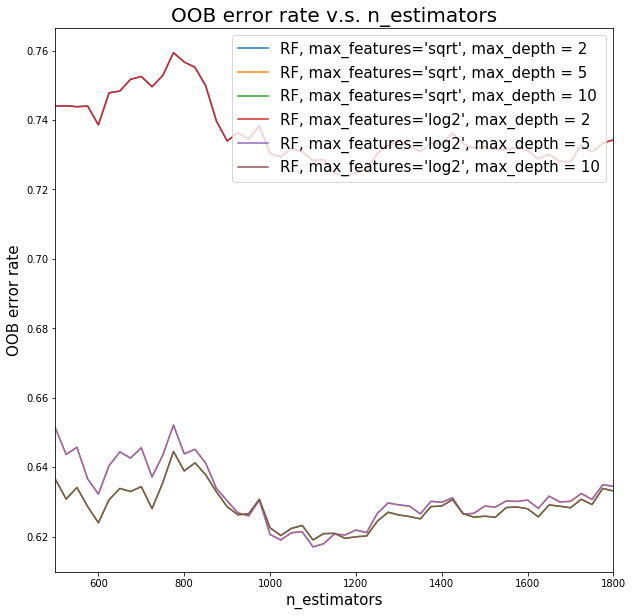

In [22]:
# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)
plt.rcParams["figure.figsize"] = [20, 20]
plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators", fontsize = 15)
plt.ylabel("OOB error rate", fontsize = 15)
plt.legend(loc="upper right", fontsize = 15)
plt.title("OOB error rate v.s. n_estimators", fontsize = 20)
plt.show()

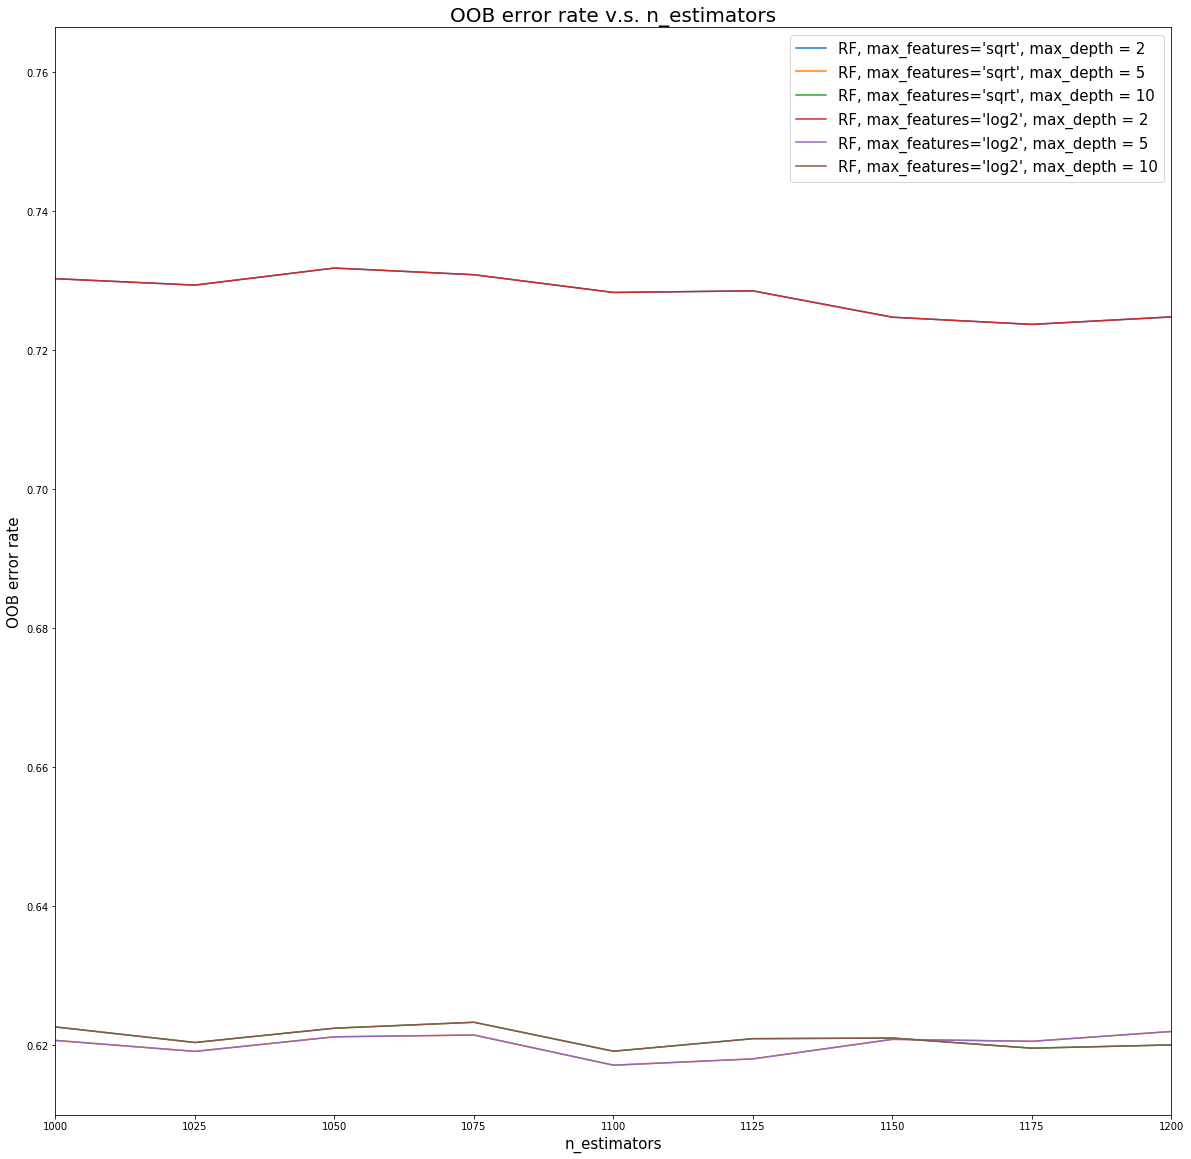

In [24]:
# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)
plt.rcParams["figure.figsize"] = [20, 20]
plt.xlim(1000, 1200)
plt.xlabel("n_estimators", fontsize = 15)
plt.ylabel("OOB error rate", fontsize = 15)
plt.legend(loc="upper right", fontsize = 15)
plt.title("OOB error rate v.s. n_estimators", fontsize = 20)
plt.show()

**From the plot above, we can see that the brown line at 1100 estimators is the best**

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
import random
import math
seed = 42
X, y = my_data.drop(columns=['ID','Dist_V1V2']), my_data.Dist_V1V2
kf = KFold(n_splits=5)

In [26]:
# Max_depth = 5, max_features = "log2"
RF_1 = RandomForestRegressor(random_state=seed, max_depth=5, n_estimators= 1100, 
                            oob_score=True, max_features = "log2")
result_negMSE_1 = cross_val_score(RF_1, X, y, cv = kf, scoring="neg_mean_absolute_error")
print("Avg kfold neg MSE: {}".format(result_negMSE_1.mean())) #Print average accuracy
output = cross_validate(RF_1, X, y, cv=kf, scoring = 'neg_mean_absolute_error', return_estimator =True)

Avg kfold neg MSE: -0.138750935182069


### Calculate the feature importance per fold

In [27]:
# Get feature importance per estimator
feature_result = []
for idx, estimator in enumerate(output['estimator']):
    print("Features sorted by their score for estimator {}:".format(idx))
    feature_importances = pd.DataFrame(estimator.feature_importances_, index = X.columns, 
                                       columns=['importance']).sort_values('importance', ascending=False)
    feature_result.append((feature_importances)) # Save the result in each loop to feature_result
    #print(feature_importances)


Features sorted by their score for estimator 0:
Features sorted by their score for estimator 1:
Features sorted by their score for estimator 2:
Features sorted by their score for estimator 3:
Features sorted by their score for estimator 4:


In [28]:
type(feature_result)

list

In [29]:
feature_result_1 = pd.DataFrame(feature_result[0])
feature_result_2 = pd.DataFrame(feature_result[1])
feature_result_3 = pd.DataFrame(feature_result[2])
feature_result_4 = pd.DataFrame(feature_result[3])
feature_result_5 = pd.DataFrame(feature_result[4])
feature_result_all = pd.concat([feature_result_1, feature_result_2, feature_result_3, 
                              feature_result_4, feature_result_5])

In [30]:
feature_result_all

,importance
Faecalibacterium.prausnitzii..ref_mOTU_v25_06108.,0.206529
Eggerthellaceae.species.incertae.sedis..meta_mOTU_v25_13204.,0.131591
Bacteroides.dorei.vulgatus..ref_mOTU_v25_02367.,0.101552
Faecalibacterium.species.incertae.sedis..meta_mOTU_v25_12376.,0.071458
Faecalibacterium.species.incertae.sedis..meta_mOTU_v25_12303.,0.070048
...,...
Faecalibacterium.species.incertae.sedis..meta_mOTU_v25_12403.,0.018312
Bacteroides.coprophilus..ref_mOTU_v25_04094.,0.018020
Faecalibacterium.sp...ref_mOTU_v25_03636.,0.017225
Bacteroides.sp...ref_mOTU_v25_03475.,0.013994


In [31]:
# Turn rownames to colum
feature_result_all.index.name = 'Feature'
feature_result_all.reset_index(inplace=True)
feature_result_all.head(10)


,Feature,importance
0,Faecalibacterium.prausnitzii..ref_mOTU_v25_06108.,0.206529
1,Eggerthellaceae.species.incertae.sedis..meta_m...,0.131591
2,Bacteroides.dorei.vulgatus..ref_mOTU_v25_02367.,0.101552
3,Faecalibacterium.species.incertae.sedis..meta_...,0.071458
4,Faecalibacterium.species.incertae.sedis..meta_...,0.070048
5,Faecalibacterium.prausnitzii..ref_mOTU_v25_06109.,0.069635
6,Bacteroides.rodentium.uniformis..ref_mOTU_v25_...,0.056335
7,Faecalibacterium.sp...ref_mOTU_v25_03636.,0.045771
8,Faecalibacterium.prausnitzii..ref_mOTU_v25_06110.,0.040618
9,Bifidobacterium.adolescentis..ref_mOTU_v25_02703.,0.039371


In [46]:
# Select only the top 10 important features for plotting
feature_result_all.sort_values(by = "importance", ascending=False, inplace=True)

# Group features and compute the median of each group 
#https://www.kite.com/python/answers/how-to-group-a-pandas-dataframe-by-a-column-and-compute-the-mean-of-each-group-in-python
grouped_feature_result_all = feature_result_all.groupby("Feature")
mean_feature = grouped_feature_result_all.median()
mean_feature = mean_feature.reset_index() #reset index to match format

# Sort by importance
pd.set_option('display.max_colwidth', None)
mean_feature.sort_values(by = "importance", ascending=False, inplace=True)
mean_feature.head(10)

,Feature,importance
9,Faecalibacterium.prausnitzii..ref_mOTU_v25_06108.,0.245918
8,Eggerthellaceae.species.incertae.sedis..meta_mOTU_v25_13204.,0.131591
10,Faecalibacterium.prausnitzii..ref_mOTU_v25_06109.,0.083851
1,Bacteroides.dorei.vulgatus..ref_mOTU_v25_02367.,0.074337
16,Faecalibacterium.species.incertae.sedis..meta_mOTU_v25_12376.,0.055852
14,Faecalibacterium.species.incertae.sedis..meta_mOTU_v25_12303.,0.042539
12,Faecalibacterium.prausnitzii..ref_mOTU_v25_06112.,0.041469
11,Faecalibacterium.prausnitzii..ref_mOTU_v25_06110.,0.040618
4,Bacteroides.rodentium.uniformis..ref_mOTU_v25_00855.,0.039732
7,Bifidobacterium.adolescentis..ref_mOTU_v25_02703.,0.039371


In [47]:
feature_plotting = feature_result_all.loc[feature_result_all['Feature'].isin
                                          (["Faecalibacterium.prausnitzii..ref_mOTU_v25_06108.",
                                            "Eggerthellaceae.species.incertae.sedis..meta_mOTU_v25_13204.",
                                            "Faecalibacterium.prausnitzii..ref_mOTU_v25_06109.",
                                           "Bacteroides.dorei.vulgatus..ref_mOTU_v25_02367.", 
                                            "Faecalibacterium.species.incertae.sedis..meta_mOTU_v25_12376.",
                                           "Faecalibacterium.species.incertae.sedis..meta_mOTU_v25_12303.", 
                                            "Faecalibacterium.prausnitzii..ref_mOTU_v25_06112.",
                                           "Faecalibacterium.prausnitzii..ref_mOTU_v25_06110.", 
                                            "Bacteroides.rodentium.uniformis..ref_mOTU_v25_00855.", 
                                            "Bifidobacterium.adolescentis..ref_mOTU_v25_02703."])]
feature_plotting.head()

,Feature,importance
72,Faecalibacterium.prausnitzii..ref_mOTU_v25_06108.,0.291550
36,Faecalibacterium.prausnitzii..ref_mOTU_v25_06108.,0.269313
54,Faecalibacterium.prausnitzii..ref_mOTU_v25_06108.,0.245918
0,Faecalibacterium.prausnitzii..ref_mOTU_v25_06108.,0.206529
55,Eggerthellaceae.species.incertae.sedis..meta_mOTU_v25_13204.,0.173583


In [51]:
# Manually sort the plotting order
order_list = ["Faecalibacterium.prausnitzii..ref_mOTU_v25_06108.",
                                            "Eggerthellaceae.species.incertae.sedis..meta_mOTU_v25_13204.",
                                            "Faecalibacterium.prausnitzii..ref_mOTU_v25_06109.",
                                           "Bacteroides.dorei.vulgatus..ref_mOTU_v25_02367.", 
                                            "Faecalibacterium.species.incertae.sedis..meta_mOTU_v25_12376.",
                                           "Faecalibacterium.species.incertae.sedis..meta_mOTU_v25_12303.", 
                                            "Faecalibacterium.prausnitzii..ref_mOTU_v25_06112.",
                                           "Faecalibacterium.prausnitzii..ref_mOTU_v25_06110.", 
                                            "Bacteroides.rodentium.uniformis..ref_mOTU_v25_00855.", 
                                            "Bifidobacterium.adolescentis..ref_mOTU_v25_02703."]

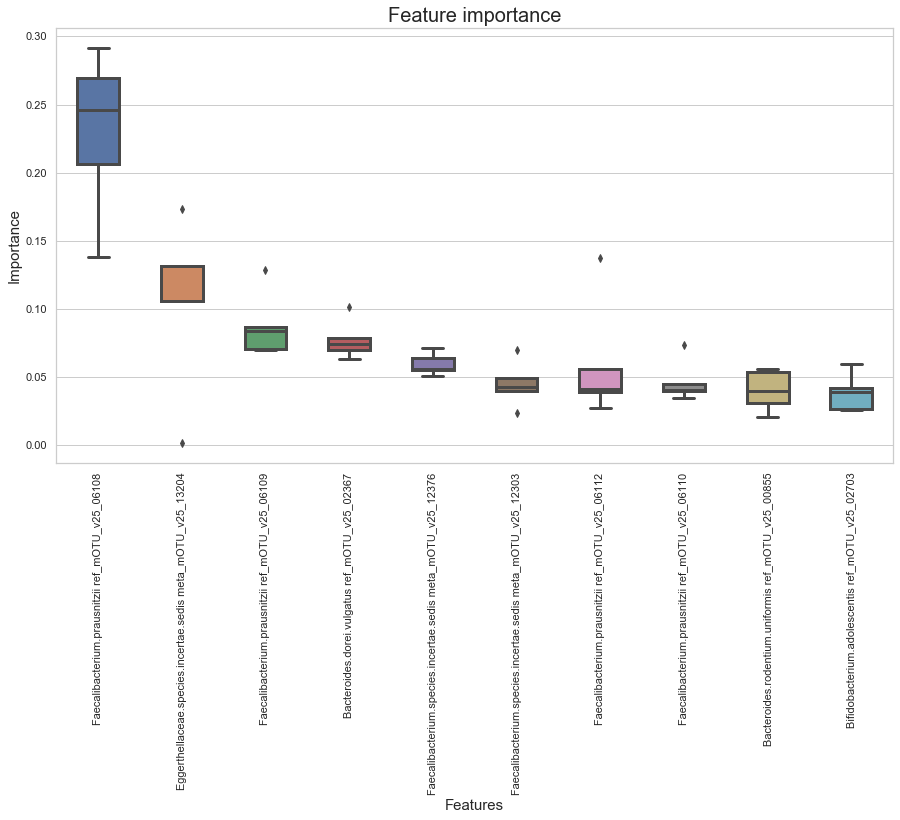

In [59]:
# Plot boxplot to see the variation of feature importance across folds 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(15,8)})
sns.set_style("whitegrid")
a = sns.boxplot(x=feature_plotting["Feature"], y=feature_plotting["importance"], 
                width=0.5, linewidth=3, order = order_list)
a.axes.set_title("Feature importance",fontsize=20)
a.set_xlabel("Features",fontsize=15)
a.set_ylabel("Importance",fontsize=15)
a.set_xticklabels(["Faecalibacterium.prausnitzii ref_mOTU_v25_06108",
                                            "Eggerthellaceae.species.incertae.sedis meta_mOTU_v25_13204",
                                            "Faecalibacterium.prausnitzii ref_mOTU_v25_06109",
                                           "Bacteroides.dorei.vulgatus ref_mOTU_v25_02367", 
                                            "Faecalibacterium.species.incertae.sedis meta_mOTU_v25_12376",
                                           "Faecalibacterium.species.incertae.sedis meta_mOTU_v25_12303", 
                                            "Faecalibacterium.prausnitzii ref_mOTU_v25_06112",
                                           "Faecalibacterium.prausnitzii ref_mOTU_v25_06110", 
                                            "Bacteroides.rodentium.uniformis ref_mOTU_v25_00855", 
                                            "Bifidobacterium.adolescentis ref_mOTU_v25_02703"],
                 rotation = 90)
plt.show()


## Step 4: Try out linear regression (within the 5 - Fold CV setup)

In [60]:
#Scaling needs to be done per fold
#Sklearn has quite useful package called pipeline where you can run scaling and classifier per fold
from sklearn.model_selection import LeaveOneOut
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore") #Suppress warnings
seed = 42

X, y = my_data.drop(columns=['ID','Dist_V1V2']), my_data.Dist_V1V2
raw_scaler = StandardScaler()
raw_scaler.fit(X)
X_scaled = raw_scaler.transform(X)

## Codes below are from https://www.kaggle.com/jnikhilsai/cross-validation-with-linear-regression

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = seed)

# Find the best hyperparameters first
# specify range of hyperparameters
hyper_params = [{'n_features_to_select': list(range(1, 60))}]

# specify model
lm = LinearRegression()
lm.fit(X_scaled, y)
rfe = RFE(lm)             

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_scaled, y)                  

Fitting 5 folds for each of 59 candidates, totalling 295 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, 30, ...]}],
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [62]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.024040,0.010329,0.001490,0.001763,1,{'n_features_to_select': 1},-0.257619,-0.138859,-0.075839,-0.220438,...,-0.179126,0.064376,51,-0.084620,-0.102090,-0.117837,-0.085201,-0.120260,-0.102002,0.015287
1,0.013991,0.001395,0.000558,0.000106,2,{'n_features_to_select': 2},-0.216696,-0.111616,-0.068603,-0.211946,...,-0.163870,0.061777,46,-0.088950,-0.084966,-0.093772,-0.068874,-0.120531,-0.091419,0.016787
2,0.011794,0.000693,0.000469,0.000005,3,{'n_features_to_select': 3},-0.198361,-0.178673,-0.091558,-0.219417,...,-0.192053,0.059160,55,-0.083261,-0.079873,-0.073337,-0.056359,-0.101335,-0.078833,0.014576
3,0.017990,0.002791,0.000515,0.000031,4,{'n_features_to_select': 4},-0.224853,-0.171043,-0.068273,-0.181939,...,-0.189461,0.075921,53,-0.052908,-0.052558,-0.057249,-0.046235,-0.072819,-0.056354,0.008951
4,0.010112,0.000453,0.000516,0.000046,5,{'n_features_to_select': 5},-0.199714,-0.139248,-0.071890,-0.142974,...,-0.172875,0.079871,49,-0.041943,-0.051029,-0.053419,-0.032900,-0.064769,-0.048812,0.010781


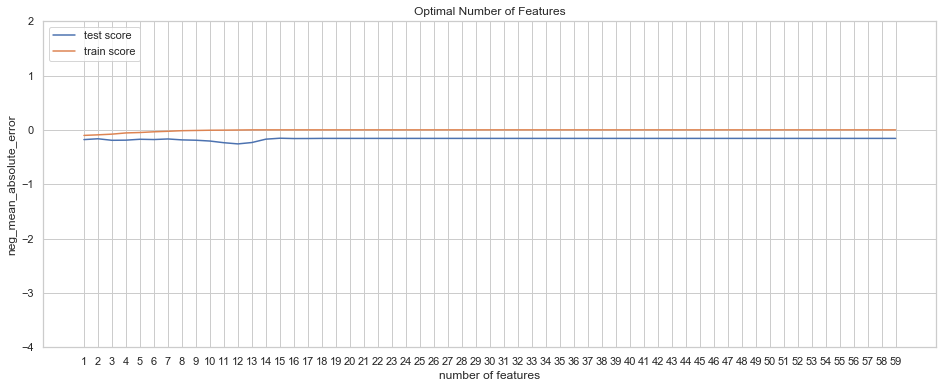

In [63]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xticks(list(range(1,60)),[str(i) for i in range(1,60)])
plt.ylim(-4, 2)
plt.xlabel('number of features')
plt.ylabel('neg_mean_absolute_error')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [65]:
# Who has the highest mean_test_score (negative mean squared error here)?
cv_results.sort_values('mean_test_score', ascending=False).head(5)
# The optimal n features = 15!

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
14,0.003887,0.000760,0.000549,0.000125,15,{'n_features_to_select': 15},-0.030229,-0.268078,-0.115841,-0.212845,...,-0.153812,0.081724,1,-1.506731e-16,-1.586033e-16,-1.387779e-16,-1.443290e-16,-1.998401e-16,-1.584447e-16,2.172576e-17
29,0.001504,0.000258,0.000706,0.000389,30,{'n_features_to_select': 30},-0.027962,-0.286001,-0.125978,-0.211385,...,-0.156972,0.086905,2,-2.022192e-16,-2.299748e-16,-2.656605e-16,-9.992007e-17,-3.219647e-16,-2.239478e-16,7.380866e-17
44,0.001655,0.000476,0.000734,0.000279,45,{'n_features_to_select': 45},-0.027962,-0.286001,-0.125978,-0.211385,...,-0.156972,0.086905,2,-2.022192e-16,-2.299748e-16,-2.656605e-16,-9.992007e-17,-3.219647e-16,-2.239478e-16,7.380866e-17
32,0.001357,0.000238,0.000486,0.000042,33,{'n_features_to_select': 33},-0.027962,-0.286001,-0.125978,-0.211385,...,-0.156972,0.086905,2,-2.022192e-16,-2.299748e-16,-2.656605e-16,-9.992007e-17,-3.219647e-16,-2.239478e-16,7.380866e-17
33,0.001136,0.000068,0.000444,0.000012,34,{'n_features_to_select': 34},-0.027962,-0.286001,-0.125978,-0.211385,...,-0.156972,0.086905,2,-2.022192e-16,-2.299748e-16,-2.656605e-16,-9.992007e-17,-3.219647e-16,-2.239478e-16,7.380866e-17


In [66]:
#Now we can choose the optimal value of number of features and build a final model.
n_features_optimal = 15
X, y = my_data.drop(columns=['ID','Dist_V1V2']), my_data.Dist_V1V2

lm = LinearRegression()
lm.fit(X_scaled, y)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_scaled, y)

In [67]:
# Summarize all features
rf_df = pd.DataFrame(rfe.support_, index=X.columns, columns=['Selected_or_not'])
# Select only the "True" (selected) ones
rf_df_t = rf_df[rf_df['Selected_or_not'] == True]
rf_df_t = rf_df_t.assign(Coefficient = rfe.estimator_.coef_) 
rf_df_t

,Selected_or_not,Coefficient
Bacteroides.coprophilus..ref_mOTU_v25_04094.,True,0.119809
Bacteroides.dorei.vulgatus..ref_mOTU_v25_02367.,True,0.229336
Bacteroides.massiliensis..ref_mOTU_v25_02135.,True,0.291341
Bacteroides.sp...ref_mOTU_v25_03475.,True,-0.331759
Bacteroides.stercoris..ref_mOTU_v25_01579.,True,-0.193579
Bifidobacterium.adolescentis..ref_mOTU_v25_02703.,True,0.153129
Faecalibacterium.prausnitzii..ref_mOTU_v25_06108.,True,0.032505
Faecalibacterium.prausnitzii..ref_mOTU_v25_06109.,True,-0.358409
Faecalibacterium.prausnitzii..ref_mOTU_v25_06112.,True,0.272460
Faecalibacterium.sp...ref_mOTU_v25_03636.,True,0.111229


Text(0.5, 0, 'Coefficient')

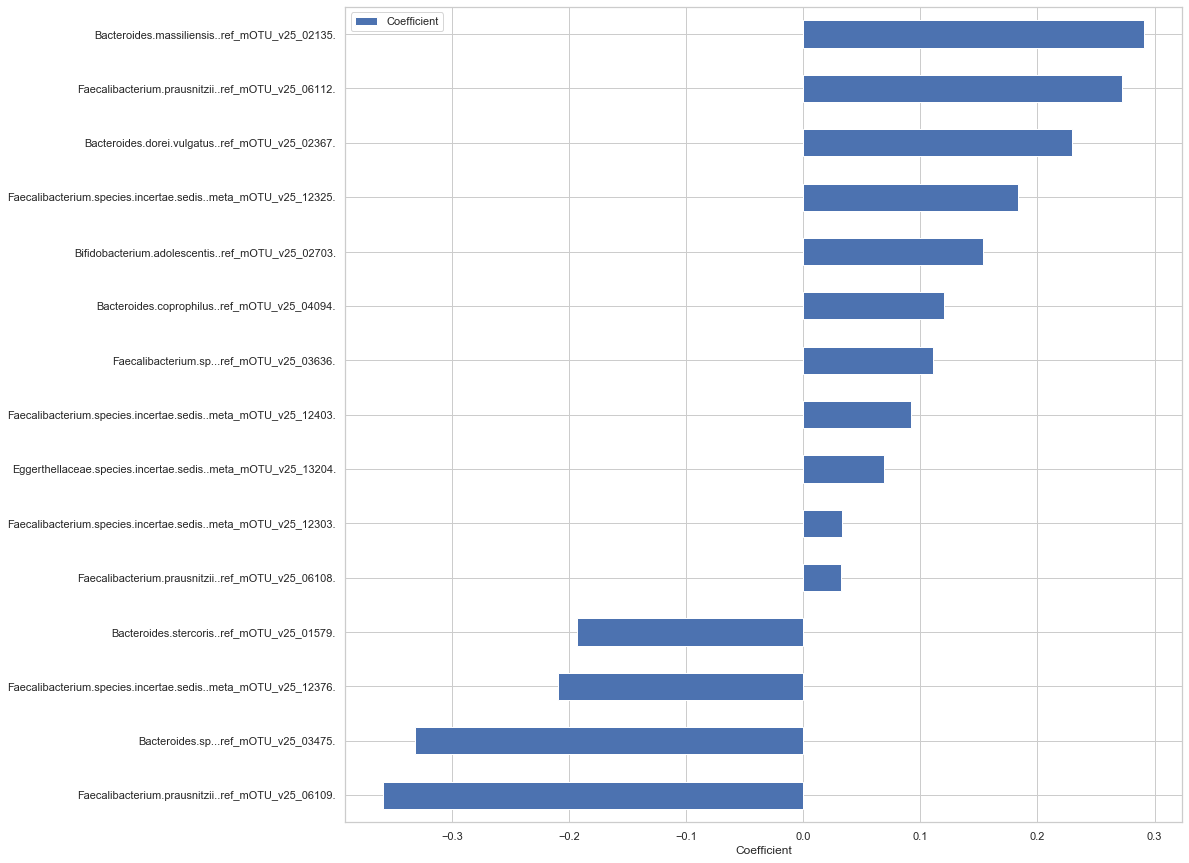

In [68]:
# Plot the coefficients
plt.rcParams['figure.figsize'] = [15, 15]
rf_df_t.sort_values('Coefficient').plot(kind='barh')
plt.xlabel("Coefficient")